<h1>Pandas Practice Assignment</h1>
<li>I've done many of the steps for you so use this notebook and fill in the various cells
<li>If you run into data size issues, subset your data. But try to use as much as you can get away with
<li>Note that many of the steps will take a while to run (a few minutes). Especially if your computer is not powerful enough. Be patient!


<ol>
<li>Read the data from <a href="https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2016-01.csv">https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2016-01.csv</a>
<li>Remove any data that is outside the NYC bounding box
<ul>
<li>NYC bounding box: westlimit=-74.2635; southlimit=40.4856; eastlimit=-73.7526; northlimit=40.9596
<li>See http://boundingbox.klokantech.com for info on bounding boxes
</ul>
<li>Calculate taxi trip duration and save in a new column "duration"
<li>Convert duration into a float
<li>Do some basic analysis (see below + do whatever you feel like)
<li>Add a day of week column
<li>Add an hour of day column
<li>Do some analysis (see below + do whatever you feel like)
<li>Break the bounding box into 100 "zones" 
<ul>
<li>Divide the longitude (-73.7526 to -74.2635) into 10 sections
<li>Divide the latitude (40.4856 to 40.9596) into 10 sections
<li>Write a function that figures out the zone given a latitude and longitude
<li>Apply this function to the dataframe, first with pickup lats and longs; then with dropoff lats and longs
<li>This will give two new "pickup_zone" and "dropoff_zone" columns
</ul>
<li>Do some analysis (see below + do whatever you feel like)
<li>OPTIONAL: A quick geojson graph!

<h2>Read the data</h2>


In [2]:
#Add necessary imports and functions to read the data
import pandas as pd
import numpy as np
datafile = '/Users/salilvaidya/Desktop/IEOR4523_DA_for_OR/yellow_tripdata_2016-01.csv'
df = pd.read_csv(datafile)

In [3]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.00,0.00,0.3,8.80
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.00,0.00,0.3,19.30
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.00,0.00,0.3,34.30
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.00,0.00,0.3,17.30
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.00,0.00,0.3,8.80
5,2,2016-01-01 00:00:00,2016-01-01 00:18:30,2,5.52,-73.980118,40.743050,1,N,-73.913490,40.763142,2,19.0,0.5,0.5,0.00,0.00,0.3,20.30
6,2,2016-01-01 00:00:00,2016-01-01 00:26:45,2,7.45,-73.994057,40.719990,1,N,-73.966362,40.789871,2,26.0,0.5,0.5,0.00,0.00,0.3,27.30
7,1,2016-01-01 00:00:01,2016-01-01 00:11:55,1,1.20,-73.979424,40.744614,1,N,-73.992035,40.753944,2,9.0,0.5,0.5,0.00,0.00,0.3,10.30
8,1,2016-01-01 00:00:02,2016-01-01 00:11:14,1,6.00,-73.947151,40.791046,1,N,-73.920769,40.865578,2,18.0,0.5,0.5,0.00,0.00,0.3,19.30
9,2,2016-01-01 00:00:02,2016-01-01 00:11:08,1,3.21,-73.998344,40.723896,1,N,-73.995850,40.688400,2,11.5,0.5,0.5,0.00,0.00,0.3,12.80


<h2>Remove data outside the bounding box</h2>


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10906858 entries, 0 to 10906857
Data columns (total 19 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID               int64
store_and_fwd_flag       object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.5+ GB


In [6]:
westlimit=-74.2635; southlimit=40.4856; eastlimit=-73.7526; northlimit=40.9596
#Remove the data that is not within the limits specified above

df.info()

df = df[(df['pickup_longitude'] > westlimit) & (df['pickup_longitude'] < eastlimit) & (df['pickup_latitude'] > southlimit) & (df['pickup_latitude'] < northlimit) & (df['dropoff_latitude'] > southlimit) & (df['dropoff_latitude'] < northlimit) & (df['dropoff_longitude'] > westlimit) & (df['dropoff_longitude'] < eastlimit)]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10906858 entries, 0 to 10906857
Data columns (total 19 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID               int64
store_and_fwd_flag       object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.5+ GB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10704033 entries, 0 to 10906857
Data columns (total 19 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    obj

<h2>Add a column for taxi trip duration</h2>
<li>strptime formats: http://pubs.opengroup.org/onlinepubs/009695399/functions/strptime.html

In [11]:
def trip_time(time):
    import datetime
    date_object=datetime.datetime.strptime(time,'%Y-%m-%d %H:%M:%S')
    return date_object

In [10]:
import datetime
df['tpep_dropoff_datetime'] = df['tpep_dropoff_datetime'].apply(lambda x : datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].apply(lambda x : datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

/Users/salilvaidya/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/salilvaidya/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/salilvaidya/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [13]:
type(df['tpep_dropoff_datetime'][0])

pandas._libs.tslib.Timestamp

<h2>Convert duration column into a float (number of seconds)</h2>
<li><span style="color:blue">timedelta64(1, 's')</span> represents one second

In [14]:
def time_in_seconds(time):
    import datetime
    import numpy as np
    seconds = time / np.timedelta64(1,'s')
    return seconds

In [12]:
df['duration'] = df['duration'].apply(lambda x : x/np.timedelta64(1,'s'))

/Users/salilvaidya/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
df['duration'].tail()

10906853        466.0
10906854         11.0
10906855    6445984.0
10906856    7194762.0
10906857         15.0
Name: duration, dtype: float64

<h2>Remove data where duration is greater than 10000 seconds</h2>

In [15]:
df = df[df['duration'] < 10000]

In [16]:
len(df)

10687384

In [17]:
df['duration'].tail()

10906851    397.0
10906852    717.0
10906853    466.0
10906854     11.0
10906857     15.0
Name: duration, dtype: float64

<h2>Plot duration and compare with a gamma distribution</h2>

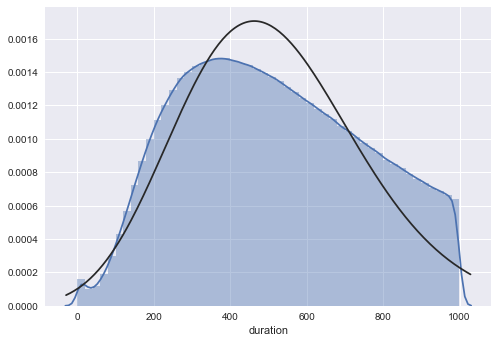

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use('seaborn')
sns.distplot(df[df['duration']<1000]['duration'],kde=True,fit=stats.gamma) #subsetting duration to get proper fit



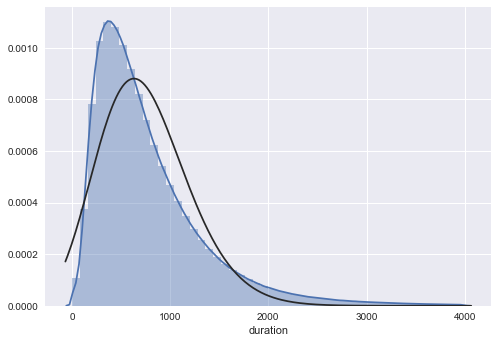

In [25]:
sns.distplot(df[df['duration']<4000]['duration'],kde=True,fit=stats.gamma) #subsetting duration to get proper fit

<h2>Plot the scatter plot between trip_distance and duration</h2>

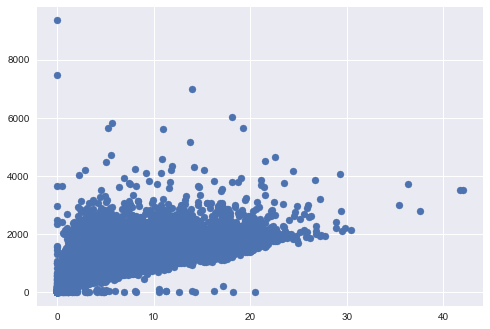

In [53]:
plt.scatter(df['trip_distance'][:50000],df['duration'][:50000]) #subsetting the data to get a proper scatter plot

<h2>Create a column "day_of_week" that puts in an integer for the weekday</h2>
<li>Monday = 1, Sunday = 7
<li>Investigate here! https://docs.python.org/3/library/datetime.html
<li>Use tpep_pickup_datetime to get the weekday

In [27]:
df['day_of_week'] = df['tpep_pickup_datetime'].apply(lambda x : x.isoweekday())

In [28]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week
0,2,2016-01-01,2016-01-01,2,1.10,-73.990372,40.734695,1,N,-73.981842,...,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8,0.0,5
1,2,2016-01-01,2016-01-01,5,4.90,-73.980782,40.729912,1,N,-73.944473,...,1,18.0,0.5,0.5,0.0,0.0,0.3,19.3,0.0,5
2,2,2016-01-01,2016-01-01,1,10.54,-73.984550,40.679565,1,N,-73.950272,...,1,33.0,0.5,0.5,0.0,0.0,0.3,34.3,0.0,5
3,2,2016-01-01,2016-01-01,1,4.75,-73.993469,40.718990,1,N,-73.962242,...,2,16.5,0.0,0.5,0.0,0.0,0.3,17.3,0.0,5
4,2,2016-01-01,2016-01-01,3,1.76,-73.960625,40.781330,1,N,-73.977264,...,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8,0.0,5


<h2>Create time of day buckets using the hour part of tpep_pickup_datetime</h2>

In [29]:
df['pickup_hour'] = df['tpep_pickup_datetime'].apply(lambda x : x.hour)

In [31]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week,pickup_hour
0,2,2016-01-01,2016-01-01,2,1.10,-73.990372,40.734695,1,N,-73.981842,...,7.5,0.5,0.5,0.0,0.0,0.3,8.8,0.0,5,0
1,2,2016-01-01,2016-01-01,5,4.90,-73.980782,40.729912,1,N,-73.944473,...,18.0,0.5,0.5,0.0,0.0,0.3,19.3,0.0,5,0
2,2,2016-01-01,2016-01-01,1,10.54,-73.984550,40.679565,1,N,-73.950272,...,33.0,0.5,0.5,0.0,0.0,0.3,34.3,0.0,5,0
3,2,2016-01-01,2016-01-01,1,4.75,-73.993469,40.718990,1,N,-73.962242,...,16.5,0.0,0.5,0.0,0.0,0.3,17.3,0.0,5,0
4,2,2016-01-01,2016-01-01,3,1.76,-73.960625,40.781330,1,N,-73.977264,...,8.0,0.0,0.5,0.0,0.0,0.3,8.8,0.0,5,0


<h2>Plot a bar graph that groups the data by day of week and then by time of day</h2>
<li>Do you notice any differences?</li>

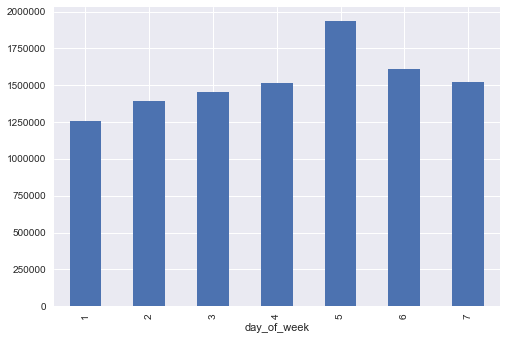

In [32]:
day_group = df.groupby('day_of_week')
day_group.size().plot(kind='bar')

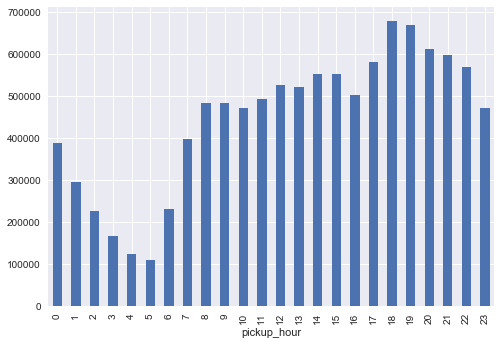

In [33]:
time_group = df.groupby('pickup_hour')
time_group.size().plot(kind='bar')

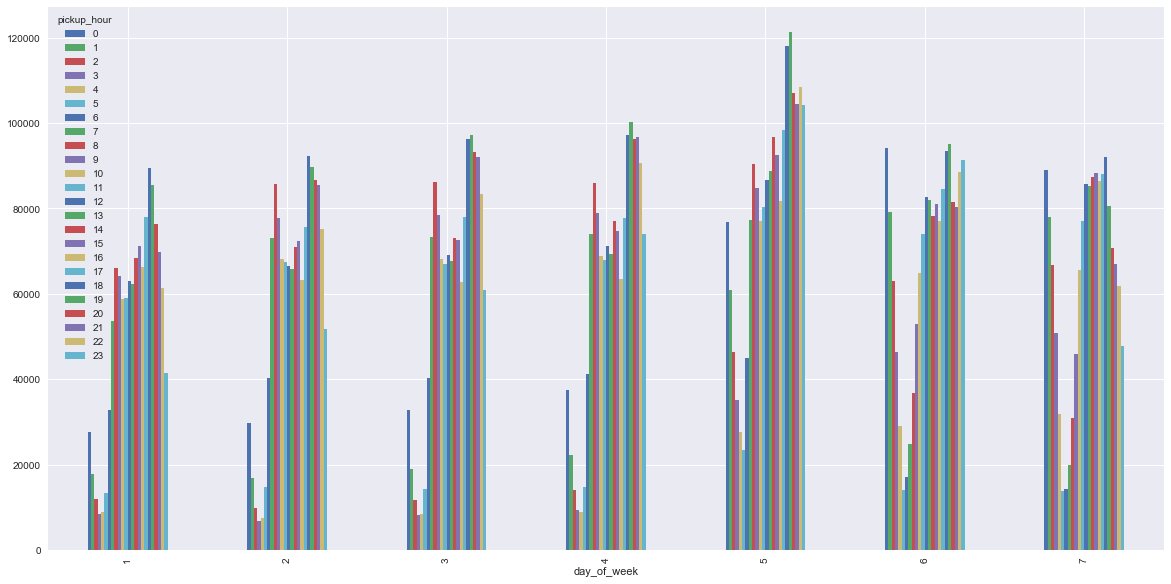

In [38]:
time_group = df.groupby(['day_of_week','pickup_hour'])
time_group.size().unstack().plot(kind='bar', figsize=(20,10))

<h2>Create zones</h2>

In [39]:
import numpy as np
westlimit=-74.2635; southlimit=40.4856; eastlimit=-73.7526; northlimit=40.9596
lat_range = northlimit - southlimit
lon_range = eastlimit - westlimit
latitude_ranges = np.append(np.arange(southlimit+lat_range/10,northlimit,lat_range/10,dtype=float),northlimit)
longitude_ranges = np.append(np.arange(westlimit+lon_range/10,eastlimit,lon_range/10,dtype=float),eastlimit)

In [40]:
longitude_ranges

array([-74.21241, -74.16132, -74.11023, -74.05914, -74.00805, -73.95696,
       -73.90587, -73.85478, -73.80369, -73.7526 ])

<h2>Write a function that returns a zone number given a latitude and a longitude</h2>
<li>I've written a part of the function for you
<li>The function should return a string zone number
<li>For the example, <span style="color:blue">get_zone(40.65,-74.19)</span> the function should return "31"

In [41]:
def get_zone(lat,lon):
    for i in range(len(latitude_ranges)):
        if lat < latitude_ranges[i]:
            break
            
   #Insert the longitude part here
    for j in range(len(longitude_ranges)):
        if lon < longitude_ranges[j]:
            break
            
    return str(i) + str(j)

#get_zone(40.65,-74.19)

In [42]:
get_zone(40.65,-74.19)

'31'

<h2>Create  pickup_zone and dropoff_zone columns for the dataframe</h2>
<li>This is a little tricky
<li>Pandas 'apply' function applies a function to each row in turn


<h4>apply</h4>

df.apply(foo)<br>
translates to<br>
foo(row1)<br>
foo(row2)<br>
foo(row3)<br>
i.e., the table row is the implicit argument of foo.
<p>
If we want to write our own foo, the argument to foo will be a dataframe row.<p>
From this row, we can extract the values we want and pass it to the explicit arguments of foo
<p>


In [33]:
import pandas as pd
df_sample = pd.DataFrame([[1,5,7],[2,4,6],[3,9,2]],columns=['A','B','C'])

print(df_sample)
def foo(x,y):
    return x+y

df_sample['new_col'] = df_sample.apply(lambda x: foo(x['A'],x['B']),axis=1)
#axis = 1 means extract data from rows of the dataframe. by default, it extracts from columns. (Set axis to 0 and see what happens)

df_sample

   A  B  C
0  1  5  7
1  2  4  6
2  3  9  2


,A,B,C,new_col
0,1,5,7,6
1,2,4,6,6
2,3,9,2,12


In [44]:
df['pickup_zone'] = df[['pickup_latitude','pickup_longitude']].apply(lambda x: get_zone(x['pickup_latitude'],x['pickup_longitude']),axis=1)
df['dropoff_zone'] = df[['dropoff_latitude','dropoff_longitude']].apply(lambda x: get_zone(x['dropoff_latitude'],x['dropoff_longitude']),axis=1)

In [35]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week,pickup_hour,dropoff_zone
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,...,0.5,0.5,0.00,0.00,0.3,8.80,0.0,5,0,55
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,...,0.5,0.5,0.00,0.00,0.3,19.30,0.0,5,0,46
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,...,0.5,0.5,0.00,0.00,0.3,34.30,0.0,5,0,66
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,...,0.0,0.5,0.00,0.00,0.3,17.30,0.0,5,0,35
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,...,0.0,0.5,0.00,0.00,0.3,8.80,0.0,5,0,55
5,2,2016-01-01 00:00:00,2016-01-01 00:18:30,2,5.52,-73.980118,40.743050,1,N,-73.913490,...,0.5,0.5,0.00,0.00,0.3,20.30,1110.0,5,0,56
6,2,2016-01-01 00:00:00,2016-01-01 00:26:45,2,7.45,-73.994057,40.719990,1,N,-73.966362,...,0.5,0.5,0.00,0.00,0.3,27.30,1605.0,5,0,65
7,1,2016-01-01 00:00:01,2016-01-01 00:11:55,1,1.20,-73.979424,40.744614,1,N,-73.992035,...,0.5,0.5,0.00,0.00,0.3,10.30,714.0,5,0,55
8,1,2016-01-01 00:00:02,2016-01-01 00:11:14,1,6.00,-73.947151,40.791046,1,N,-73.920769,...,0.5,0.5,0.00,0.00,0.3,19.30,672.0,5,0,86
9,2,2016-01-01 00:00:02,2016-01-01 00:11:08,1,3.21,-73.998344,40.723896,1,N,-73.995850,...,0.5,0.5,0.00,0.00,0.3,12.80,666.0,5,0,45


<h2>Calculate the following</h2>
<li>Percentage of the total that the pickup zone is the same as the dropoff zone
<li>Zone with the highest pickups
<li>Zone with the highest dropoffs

In [45]:
percentage = ((df['pickup_zone'] == df['dropoff_zone']).sum()/ len(df)) * 100
print("Percentage of total with same pickup and dropoff zone = ",percentage)

Percentage of total with same pickup and dropoff zone =  51.7934416879


In [46]:
pickup = df.groupby('pickup_zone')

print("Zone with highest pickups :",pickup.size().nlargest(1).index[0])
#pickup.size().idxmax()

#pickup.size()[pickup.size()==max(pickup.size())].index[0]

Zone with highest pickups : 55


In [47]:
dropoff = df.groupby('dropoff_zone')
print("Zone with highest dropoffs :",dropoff.size().nlargest(1).index[0])

Zone with highest dropoffs : 55


<h2>Groupby analysis</h2>
<li>Group data by the hour of the day and by the pickup zone
<li>Draw a figure of 24 plots that show the top 5 pickup zones at each hour


In [48]:
grouped = df.groupby(['pickup_hour','pickup_zone']).size().unstack().transpose()
#grouped.size().unstack().plot(kind='bar')
grouped

pickup_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
pickup_zone,,,,,,,,,,,,,,,,,,,,,
00,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
05,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
11,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
12,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,3.0,1.0


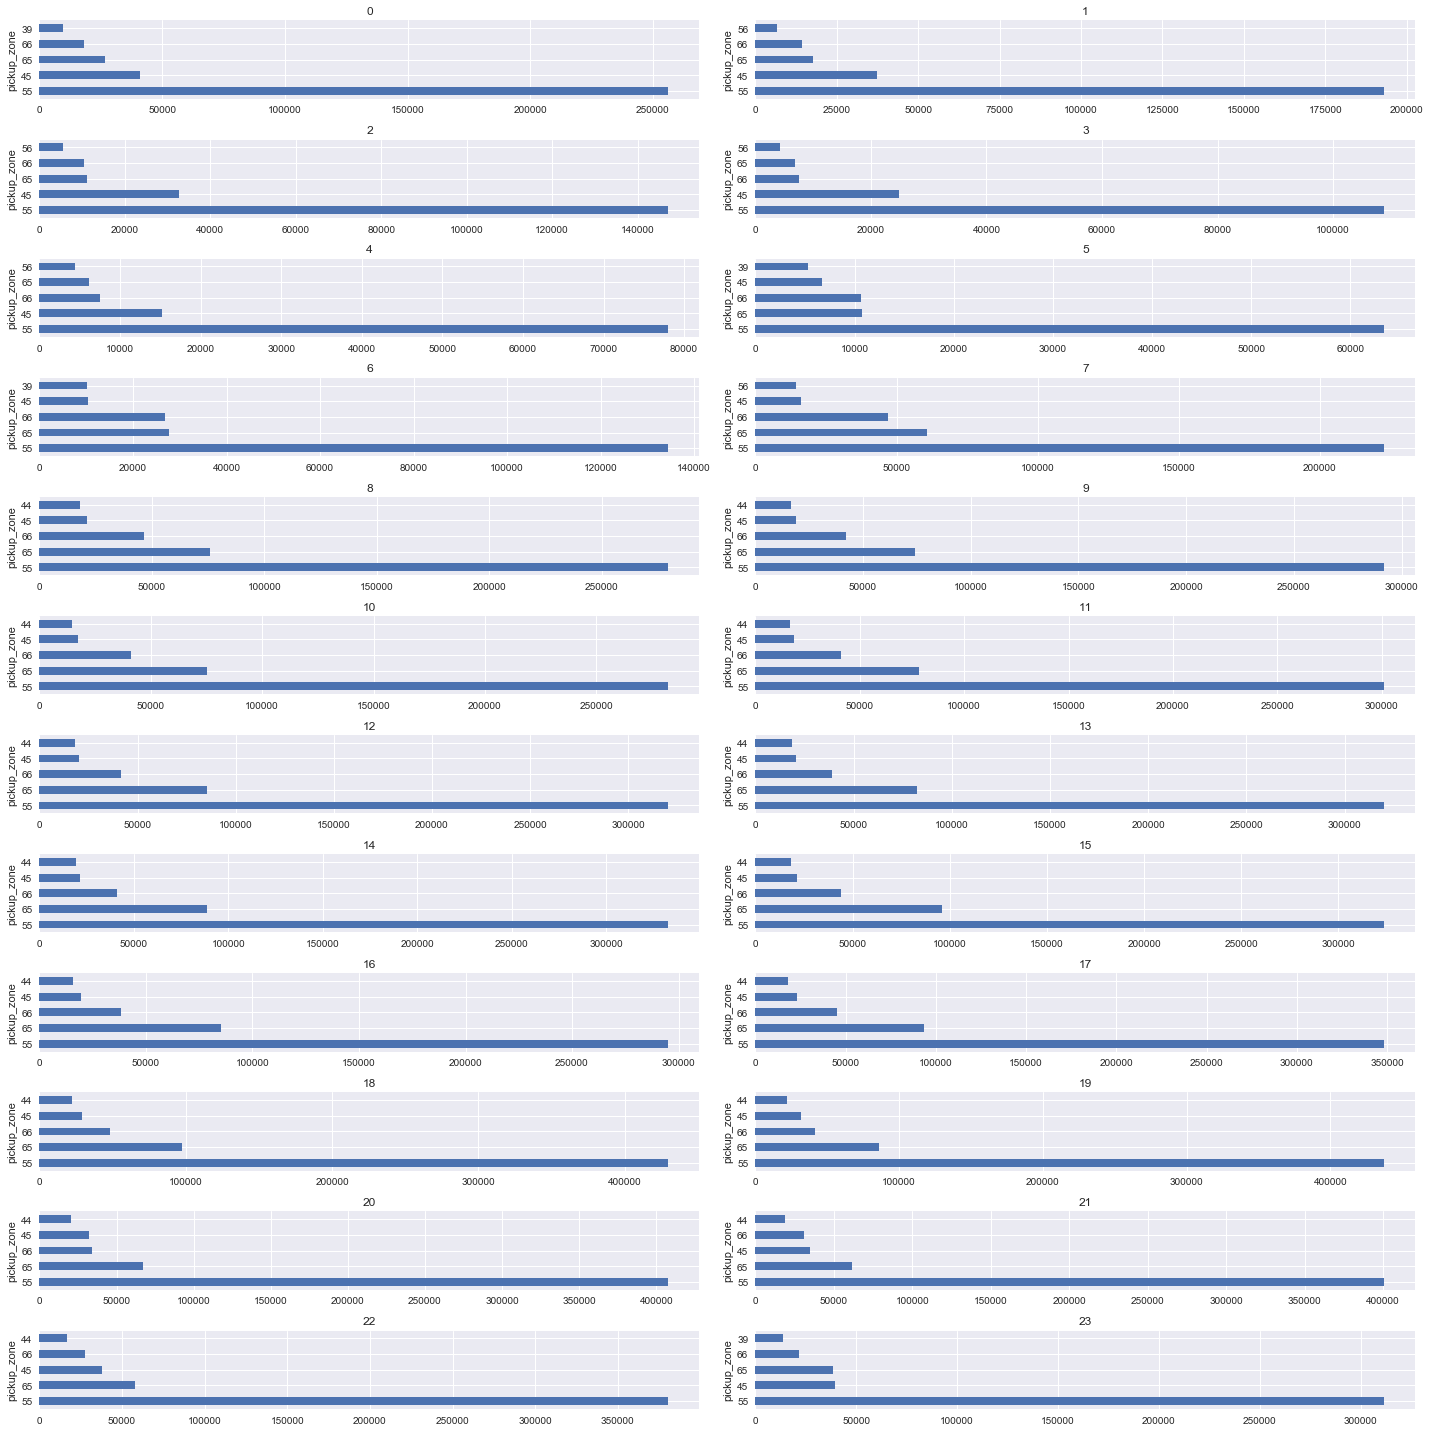

In [49]:
COL_NUM = 2
ROW_NUM = 12
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(20,20))

for i, (pickup_zone, hour_count) in enumerate(grouped.items()): 
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    hour_count = hour_count.sort_values(ascending=False)[:5] 
    hour_count.plot(kind='barh', ax=ax)
    ax.set_title(pickup_zone)

plt.tight_layout() 

<h2>Groupby analysis 2</h2>
<li>Group data by the weekday and the pickup zone
<li>Draw a figure of 7 plots that show the top 5 pickup zones on each day

In [50]:
grouped2 = df.groupby(['day_of_week','pickup_zone']).size().unstack().transpose()
#grouped2.size().unstack().plot(kind = 'bar')
grouped2

day_of_week,1,2,3,4,5,6,7
pickup_zone,,,,,,,
00,NaN,NaN,NaN,NaN,NaN,1.0,NaN
01,NaN,NaN,NaN,1.0,NaN,NaN,1.0
02,NaN,NaN,NaN,NaN,1.0,NaN,NaN
03,NaN,NaN,1.0,1.0,NaN,NaN,NaN
04,NaN,NaN,NaN,NaN,2.0,NaN,NaN
05,NaN,NaN,NaN,NaN,NaN,3.0,NaN
10,NaN,2.0,1.0,NaN,NaN,1.0,NaN
11,NaN,2.0,NaN,1.0,NaN,NaN,2.0
12,NaN,NaN,NaN,6.0,2.0,2.0,1.0


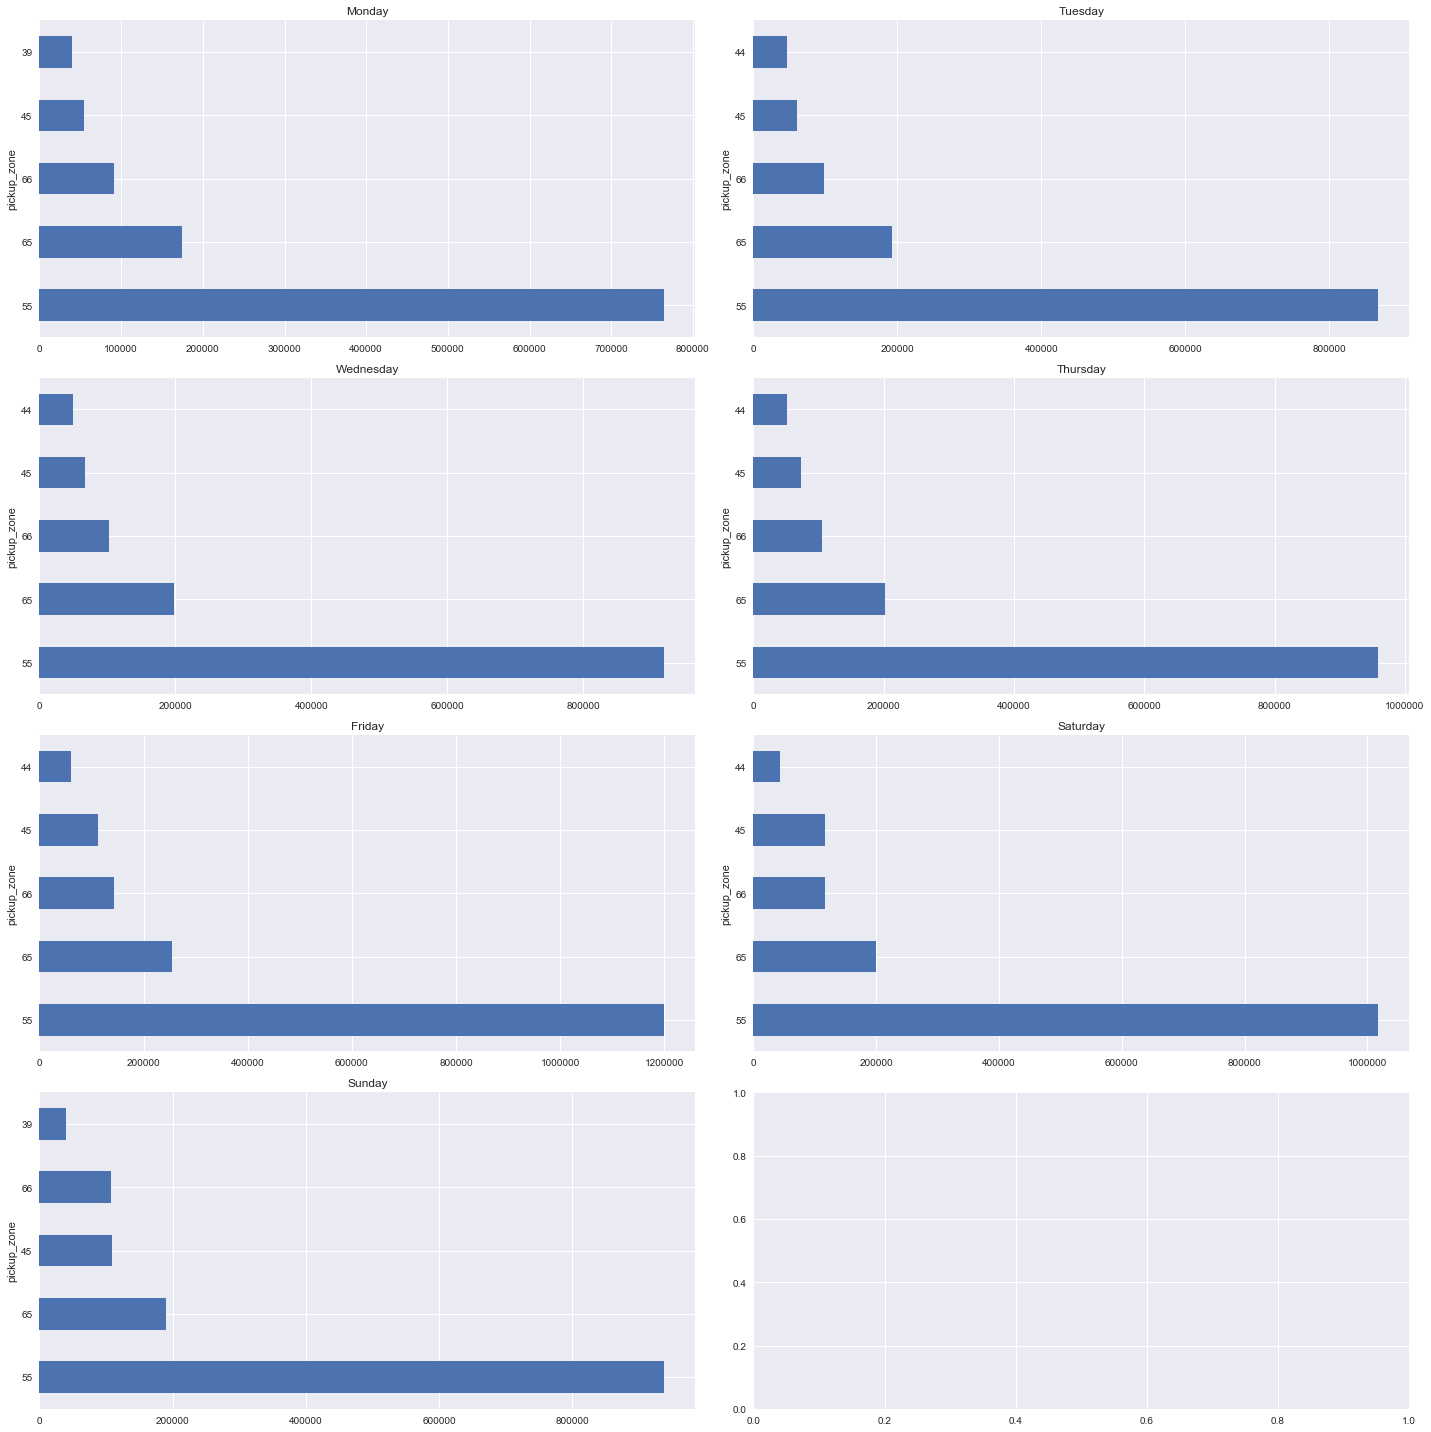

In [51]:
COL_NUM = 2
ROW_NUM = 4
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(20,20))
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
for i, (pickup_zone, day_count) in enumerate(grouped2.items()): 
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    day_count = day_count.sort_values(ascending=False)[:5] 
    day_count.plot(kind='barh', ax=ax)
    ax.set_title(days[i])

plt.tight_layout() 

<h1>COMPLETELY OPTIONAL!</h1>
<li>Identify the most frequent pickup zone between 8 am and 9 am on a weekday
<li>Identify the most frequent dropoff zone associated with the that zone, time, day combination (this zone should be different from the pickup zone
<li>Construct a geojson object with polygons for each of the two zones
<li>Render it on an openstreet map (using geojsonio)